In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import json
import pandas as pd
import numpy as np
import plotly.plotly as py
import plotly.tools as tls
import requests
import seaborn as sns
import time
from datetime import datetime as dt

In [2]:
# File to Load 
mojo_data_load = "mojo_data.csv" ### --formatted manually
tmdb_details_load = "tmdb_details.csv"
tmdb_data_load = "tmdb_data_cleaned.csv"
movie_complete_load = "movie_data_complete.csv"


# Read the csv Data

mojo_data_df = pd.read_csv(mojo_data_load)
tmdb_details_data_df = pd.read_csv(tmdb_details_load)
tmdb_data_load_df = pd.read_csv(tmdb_data_load)
movie_complete_load_df = pd.read_csv(movie_complete_load)


In [3]:
# Dataset1 Converting Mojo Dataset into a new dataframe
mojo_data_df = pd.DataFrame(mojo_data_df)
mojo_data_df.head()

domestic_total      genre        budget   rating release_date  \
0             NaN     Horror           NaN  Unknown    20-Nov-15   
1         52384.0  Animation           NaN        R    12-Dec-08   
2         15919.0   Thriller           NaN  Unrated    10-Aug-12   
3      32391374.0    Romance  $7.5 million    PG-13    17-Jul-09   
4        230600.0     Comedy           NaN        R    23-Oct-09   

                title  opening_total  
0             #Horror            NaN  
1                9.99          478.0  
2     $upercapitalist         8372.0  
3  500 Days of Summer            NaN  
4            Untitled        18002.0

In [4]:
# Create Graph1 x & y axis for Mojo Data - Top 5 Highest Revenue Movies
mojo_data_df1 = mojo_data_df[['title','genre', 'domestic_total']]
mojo_data_df_top = mojo_data_df1.sort_values('domestic_total', ascending=False).nlargest(5, 'domestic_total')
mojo_data_df_sort = mojo_data_df_top.rename(columns={'title': 'Movie Title','domestic_total': 'Total Revenue'})
#mojo_data_df_sort["Total Revenue"]= mojo_data_df_sort["Total Revenue"].map("${:,.0f}".format)
mojo_data_df_sort

Movie Title               genre  Total Revenue
16281  Star Wars: The Force Awakens      Sci-Fi Fantasy    936662225.0
5208                         Avatar    Sci-Fi Adventure    749766139.0
5728                  Black Panther  Action / Adventure    700059566.0
5216         Avengers: Infinity War  Action / Adventure    678815482.0
11141                Jurassic World  Action / Adventure    652270625.0

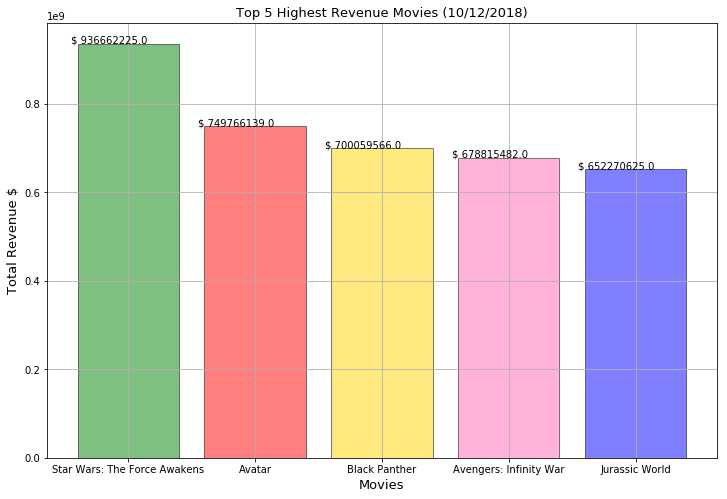

In [5]:
############### Mojo Data Graph 1 -Top 5 Highest Revenue Movies  #################

# Set Date format for the title
Date = dt.now().strftime("(%m/%d/%Y)")

# Create a Bar plot title, x axis label, and y axis label for the bar chart
plt.figure(figsize = (12,8))
x_axis = mojo_data_df_sort["Movie Title"]
y_axis =mojo_data_df_sort["Total Revenue"]
plt.bar(x_axis,y_axis, color = ['green', 'red', 'gold','hotpink', 'blue'],alpha=0.5, align="center", edgecolor = "black")
plt.title("Top 5 Highest Revenue Movies " +  str(Date),fontsize=13)
plt.xlabel("Movies",fontsize=13)
plt.ylabel("Total Revenue $",fontsize=13)

# Adds aggregate text on the bars
for a, k in enumerate(y_axis):
    plt.text(a-0.45, k,  "$ "+ str(round(k,2)), color='black',fontsize=10) 
    
plt.grid()

# Save Figure 
plt.savefig("Mojo Data Top 5 Highest Revenue Movies Bar Plot.png", bbox_inches='tight')

# Show Plot
plt.show()

In [6]:
# Create Graph 2 x & y axis for Mojo Data - Top 10 Highest Opening Total Movie Counts per Genre Bar Graph
mojo_data = mojo_data_df[['title','genre', 'opening_total']]
mojo_data = mojo_data.copy()
mojo_data['opening_total'].fillna(0, inplace=True)
mojo_data_sort = mojo_data.sort_values('opening_total', ascending=False).nlargest(10, 'opening_total')
mojo_data_sort_df = mojo_data_sort.rename(columns={'title': 'Movie Name', 'genre': 'Genre','opening_total': 'Opening_Total'})
mojo_data_sort_df["Opening_Total"]= mojo_data_sort_df["Opening_Total"].map("${:,.0f}".format)
mojo_data_sort_df

Movie Name               Genre Opening_Total
5216         Avengers: Infinity War  Action / Adventure  $257,698,183
16281  Star Wars: The Force Awakens      Sci-Fi Fantasy  $247,966,675
16282      Star Wars: The Last Jedi      Sci-Fi Fantasy  $220,009,584
11141                Jurassic World  Action / Adventure  $208,806,270
2583          Marvel's The Avengers  Action / Adventure  $207,438,708
5728                  Black Panther  Action / Adventure  $202,003,951
5215        Avengers: Age of Ultron  Action / Adventure  $191,271,109
10663                 Incredibles 2           Animation  $182,687,905
725      Captain America: Civil War  Action / Adventure  $179,139,142
5301           Beauty and the Beast             Fantasy  $174,750,616

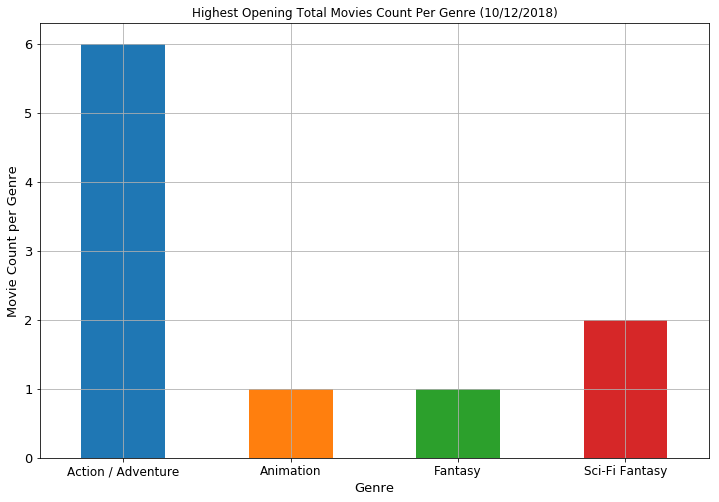

In [7]:
############### Mojo Data Graph 2.1 - Highest Opening Total Movie Counts per Genre Bar Graph  #################
# Set Date format for the title
Date = dt.now().strftime("(%m/%d/%Y)")

# Create a Bar plot title, x axis label, and y axis label for the bar chart
plt.figure(figsize = (12,8))
Genre_groups = mojo_data_sort_df.groupby('Genre')
Genre_Revenue = Genre_groups['Opening_Total'].count()
Genre_Revenue_chart = Genre_Revenue.plot(kind="bar", title="Highest Opening Total Movies Count Per Genre " +  str(Date),fontsize=13)
plt.ylabel("Movie Count per Genre",fontsize=13)
plt.xlabel("Genre",fontsize=13)
plt.xticks(rotation='horizontal',fontsize=12)
plt.grid()

# Save Figure 
plt.savefig("Mojo Data Highest Opening Total Movies Count Per Genre Bar Plot.png", bbox_inches='tight')

# Show Plot
plt.show()

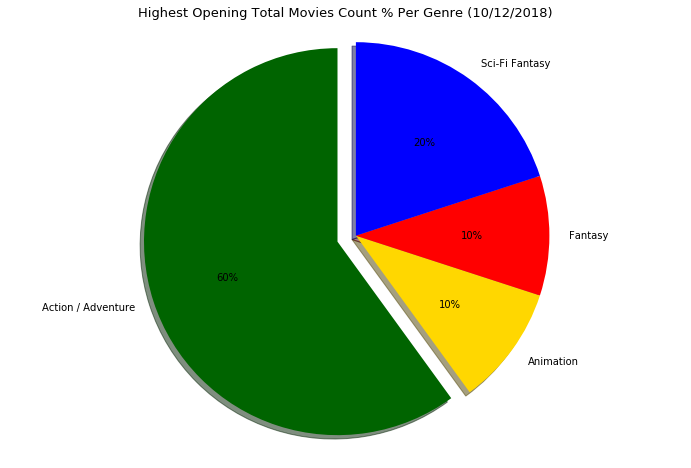

In [8]:
############### Mojo Data Graph 2.2 - Highest Opening Total Movie Count % Per Genre Pie Chart  #################

# Set Date format for the title
Date = dt.now().strftime("(%m/%d/%Y)")

# Create a pie chart title, and Pie chart
plt.figure(figsize = (12,8))
labels = ['Action / Adventure', 'Animation','Fantasy','Sci-Fi Fantasy']
sizes=mojo_data_sort_df.groupby('Genre')['Opening_Total'].count()
colors = []
explode =(0.1,0,0,0)
colors = ['darkgreen', 'gold', 'red', 'blue']
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.0f%%', shadow=True, startangle=90)
plt.title("Highest Opening Total Movies Count % Per Genre " +  str(Date),fontsize=13)

# Create axes which are equal so we have a perfect circle
plt.axis("equal")

# Save Plot
plt.savefig("Mojo Data Highest Opening Total Movie Count % Per Genre Pie Chart.png", bbox_inches='tight')

#Show Plot
plt.show()

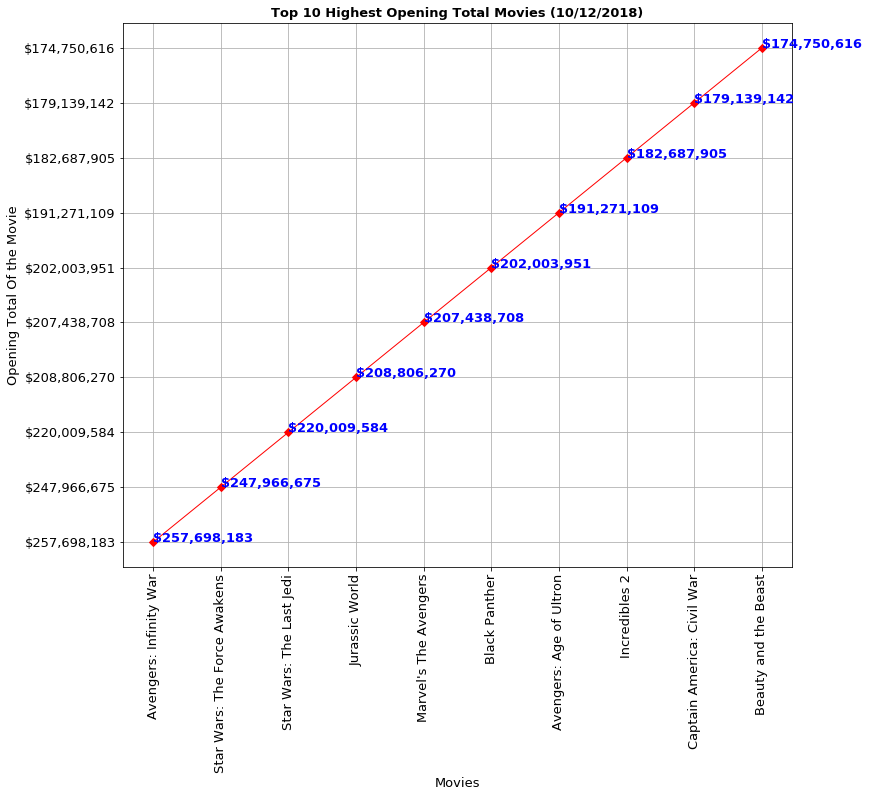

In [9]:
################ Mojo Data Graph 3 - Mojo Data Top 10 Highest Opening Total Movies ########################

# Set Date format for the title
Date = dt.now().strftime("(%m/%d/%Y)")

# Create a line chart 
plt.figure(figsize = (12,10))
x_axis = mojo_data_sort_df["Movie Name"]
y_axis= mojo_data_sort_df["Opening_Total"]
plt.plot(x_axis,y_axis, linewidth=1, marker="D", color="red")

# Set Plot Properties
plt.title(("Top 10 Highest Opening Total Movies " +  str(Date)),fontweight='bold',fontsize=13)
plt.xticks(rotation=90,fontsize=13)
plt.yticks(rotation=360,fontsize=13)
plt.ylabel("Opening Total Of the Movie",fontsize=13)
plt.xlabel("Movies",fontsize=13)
plt.grid()

# Adds aggregate text on the line
for a, k in enumerate(y_axis):
    plt.text(a, k,  k, color='blue',fontsize=13,fontweight='bold')         

# Save Plot
plt.savefig("Mojo Data Top 10 Highest Opening Total Movies Line Chart.png", bbox_inches='tight')


# Show the Plot
plt.show()

In [10]:
# Dataset 2 TMDB Details Dataset
tmdb_details_data_df = pd.DataFrame(tmdb_details_data_df)
df = tmdb_details_data_df.sort_values('popularity', ascending=False).groupby('main_genre').first()
df = df.reset_index()
df

main_genre  tmdb_id    imdb_id  \
0            Action   363088  tt5095030   
1         Adventure   299536  tt4154756   
2         Animation   476292  tt7339826   
3            Comedy   458342  tt5536610   
4             Crime   402900  tt5164214   
5       Documentary   539199  tt8758548   
6             Drama   332562  tt1517451   
7            Family   400155  tt5220122   
8           Fantasy   181808  tt2527336   
9           History   369972  tt1213641   
10           Horror   335983  tt1270797   
11            Music   487740  tt5822154   
12          Mystery   335984  tt1856101   
13          Romance   454983  tt3799232   
14  Science Fiction   445651  tt4073790   
15         TV Movie   447061  tt6582384   
16         Thriller   395841  tt5057140   
17              War   429351  tt1413492   
18          Western   440161  tt4971344   

                                      title  popularity release_date  \
0                      Ant-Man and the Wasp     273.014     7/4/2018   
1                    Avengers: Infinity War     146.730    4/25/2018   
2   Maquia: When the Promised Flower Blooms      30.965    2/24/2018   
3                              Private Life      36.515    10/5/2018   
4                             Ocean's Eight      46.730     6/7/2018   
5           The Great Buster: A Celebration      22.064    10/5/2018   
6                            A Star Is Born      75.342    10/3/2018   
7     Hotel Transylvania 3: Summer Vacation      64.887    6/28/2018   
8                  Star Wars: The Last Jedi      48.610   12/13/2017   
9                                 First Man      23.701   10/11/2018   
10                                    Venom     373.375    10/3/2018   
11                               The Singer      20.495    10/5/2018   
12                        Blade Runner 2049      33.776    10/4/2017   
13                        The Kissing Booth      30.237    5/11/2018   
14                        The Darkest Minds      40.365     8/2/2018   
15                    Red Nose Day Actually       7.599    3/24/2017   
16                            Hold the Dark      44.504    9/28/2018   
17                                12 Strong      12.385    1/16/2018   
18                     The Sisters Brothers      14.082    9/19/2018   

         revenue  vote_count  vote_average  
0   4.658796e+08        2376           6.9  
1   2.046240e+09        8501           8.3  
2   0.000000e+00          19           5.6  
3   0.000000e+00           3           8.0  
4   2.954741e+08        1888           6.9  
5   0.000000e+00           0           0.0  
6   0.000000e+00          99           7.0  
7   1.001760e+08         718           6.8  
8   1.332460e+09        6811           7.1  
9   0.000000e+00          18           1.0  
10  0.000000e+00         198           6.5  
11  0.000000e+00           0           0.0  
12  2.592397e+08        5323           7.3  
13  0.000000e+00        2075           7.4  
14  0.000000e+00         354           6.8  
15  0.000000e+00          91           7.4  
16  0.000000e+00         100           5.6  
17  6.292896e+07         946           5.3  
18  0.000000e+00          92           7.6

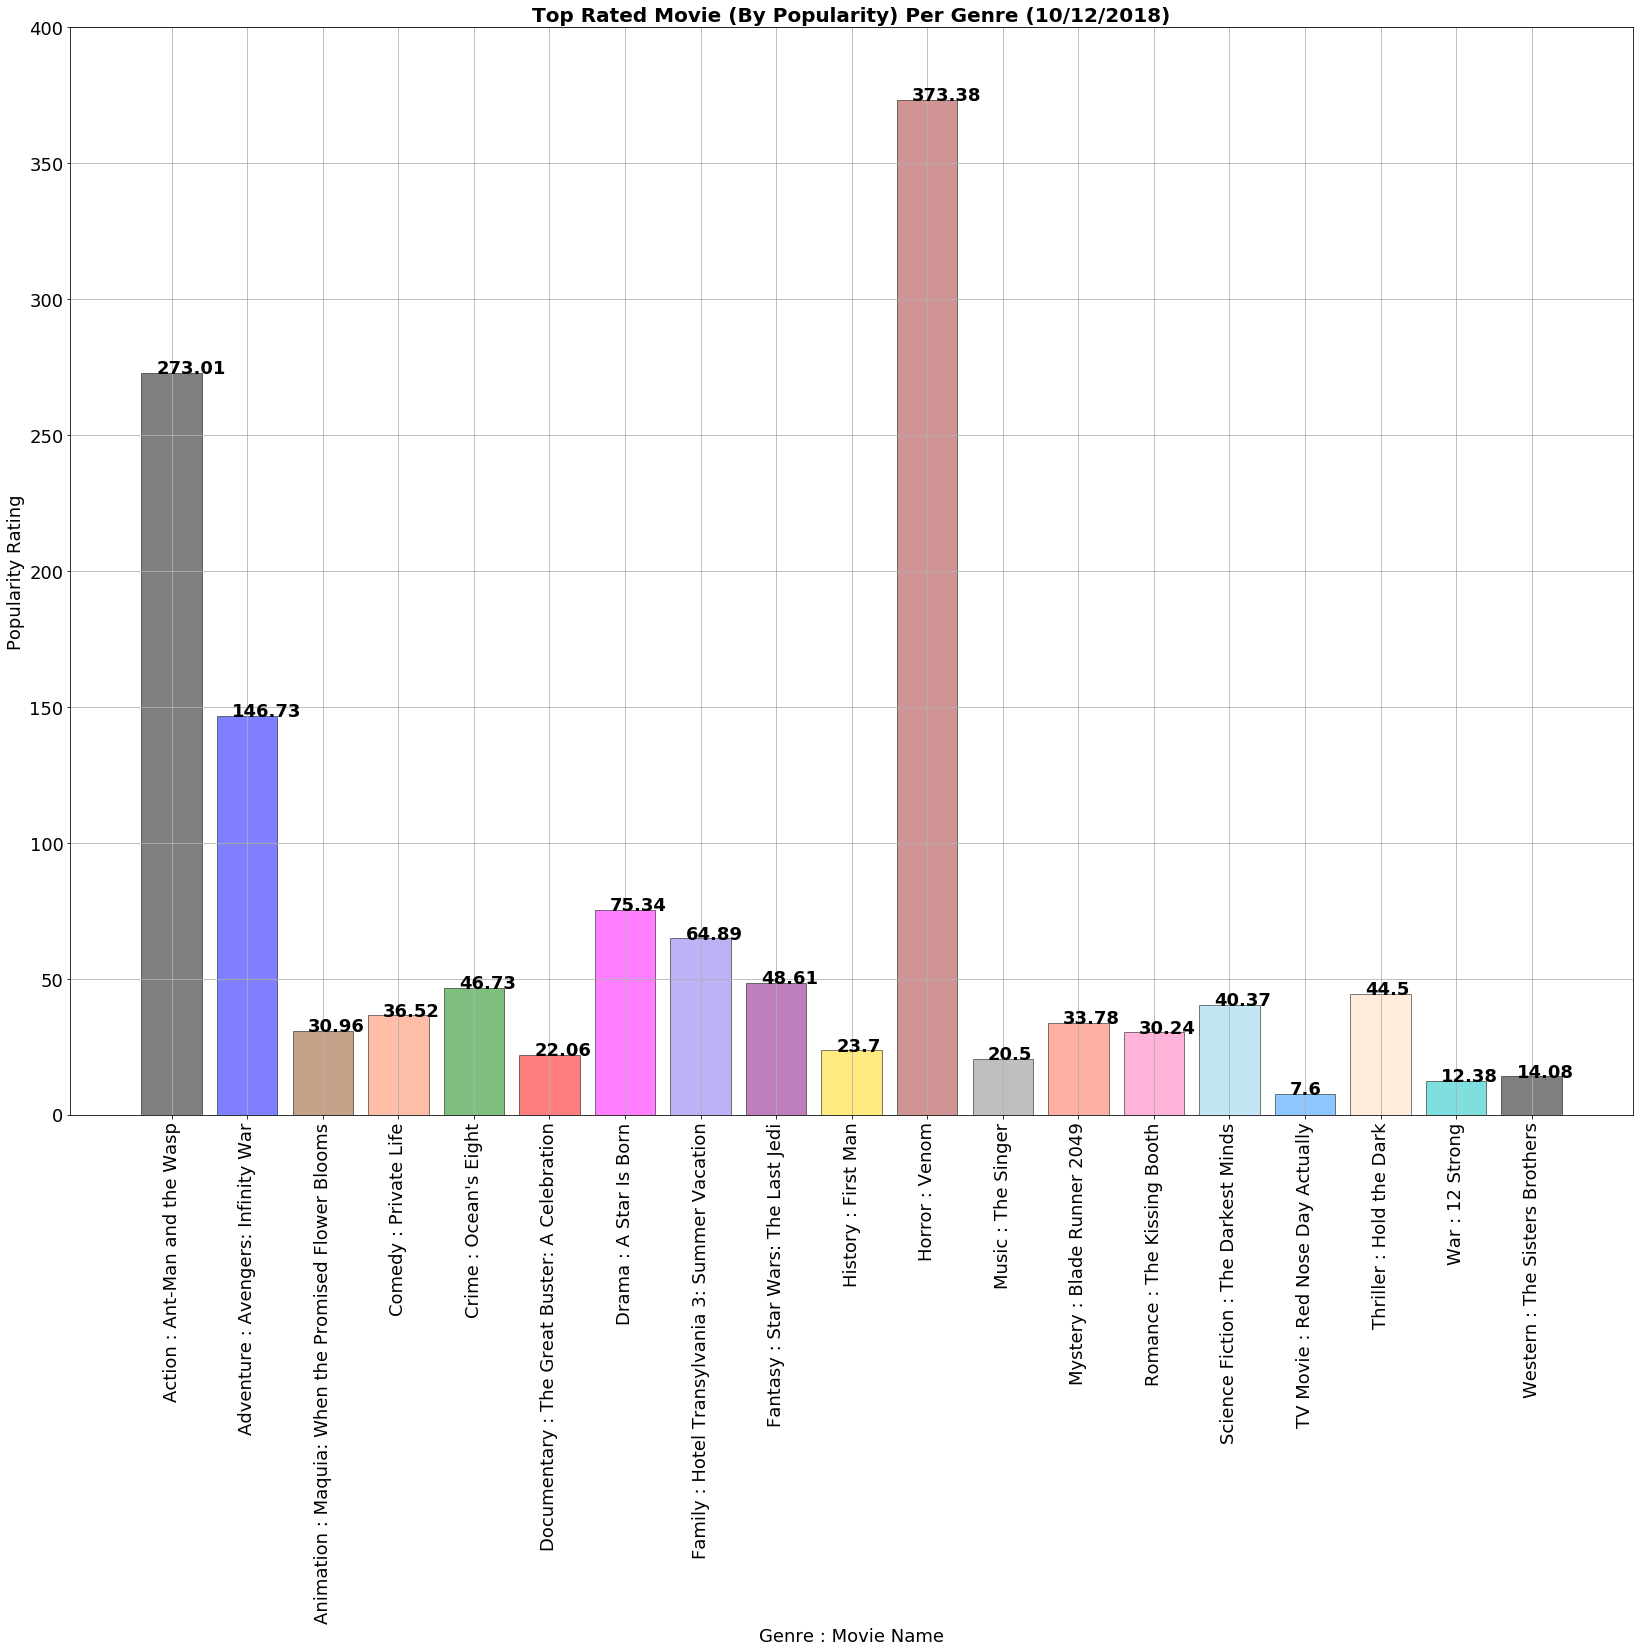

In [11]:
################ TMDB Details Data Graph 4 - Determine the Top Rated Movie (By Popularity) for each Genre ##################
# Set Date format for the title
Date = dt.now().strftime("(%m/%d/%Y)")

# Create a Bar chart
plt.figure(figsize = (28,20))
plt.ylim(0, 400)
y_axis = df[['main_genre', 'title']].apply(lambda x: ' : '.join(x), axis=1)
x_axis= df["popularity"]

plt.bar(y_axis,x_axis, color = ['black','b','saddlebrown', 'coral', 'green', 'red', 'magenta',
                                'mediumslateblue','purple', 'gold','brown',
                                'grey', 'tomato','hotpink', 'skyblue','dodgerblue','peachpuff','c'],alpha=0.5, align="center", edgecolor = "black")


# Set Plot Properties
plt.title(("Top Rated Movie (By Popularity) Per Genre " +  str(Date)),fontweight='bold',fontsize=20)
plt.xticks(rotation=90,fontsize=18)
plt.yticks(rotation=360,fontsize=18)
plt.ylabel("Popularity Rating",fontsize=18)
plt.xlabel("Genre : Movie Name",fontsize=18)
plt.ylim(ymin=0)


plt.grid()

# Adds aggregate text on the bars
for a, k in enumerate(x_axis):    
    plt.text(a-0.2, k-0.25, str(round(k,2)), color='black',rotation='horizontal', fontweight='bold',fontsize=18)        
        
# Save Plot
plt.savefig("TMDB Details Data Determine the Top Rated Movie (By Popularity) for each Genre Bar Plot.png", bbox_inches='tight')

        
# Show the Plot
plt.show()

In [12]:
# Converting Combined TMDB Dataset into a new dataframe
tmdb_data_load_df = pd.DataFrame(tmdb_data_load_df)
tmdb_data_load_df.head()

movie_id    imdb_id                           title main_genre  \
0    242606  tt2531334                   Keep Watching   Thriller   
1    271404  tt1724970                  Beyond Skyline     Action   
2    297172  tt7061088                       Downsized   TV Movie   
3    297725  tt1318517  The Man Who Killed Don Quixote  Adventure   
4    300665  tt2620590                     Leatherface     Horror   

   movie_populartiy                 release_date  revenue  vote_count  \
0             7.269  2017-05-04 00:00:00.0000000        0         105   
1             4.935  2017-10-20 00:00:00.0000000   992181         438   
2             2.650  2017-06-18 00:00:00.0000000        0           0   
3             9.595  2018-05-19 00:00:00.0000000        0         110   
4             8.392  2017-09-14 00:00:00.0000000        0         432   

   vote_average  actor_id         ...          actor_imdb_id     actor_name  \
0           5.0     98285         ...              nm2254074   Bella Thorne   
1           4.8     81685         ...              nm0342029   Frank Grillo   
2           0.0     80758         ...              nm0462673   Boris Kodjoe   
3           7.3   1023139         ...              nm3485845    Adam Driver   
4           5.2     10822         ...              nm0001151  Stephen Dorff   

   actor_popularity director_birthday director_deathday  director_id  \
0             4.176               NaN               NaN      1223247   
1             4.234               NaN               NaN       128636   
2             0.840               NaN               NaN       235557   
3             0.978        11/22/1940               NaN          280   
4             3.168               NaN               NaN        81045   

  director_gender director_imdb_id   director_name  director_popularity  
0               0        nm1862368     Sean Carter                0.600  
1               0        nm2880943  Liam O'Donnell                0.600  
2               1        nm2985554   Rhonda Baraka                0.600  
3               2        nm0000416   Terry Gilliam                1.933  
4               0        nm2377660    Julien Maury                0.600  

[5 rows x 23 columns]

In [13]:
# Create TMDB Combined Data(Actor data)
tmdb_actors = tmdb_data_load_df[['title','actor_name', 'actor_popularity','actor_gender' ,'actor_deathday']]
tmdb_actors_sort = tmdb_actors.sort_values('actor_popularity', ascending=False).nlargest(20, 'actor_popularity')
tmdb_actors_sort

title          actor_name  \
1192                                 Venom           Tom Hardy   
7409  The Immortal Life of Henrietta Lacks          Rose Byrne   
1743                         Juliet, Naked          Rose Byrne   
6333                           Rough Night  Scarlett Johansson   
968                     Ghost in the Shell  Scarlett Johansson   
4346                 Rock and a Hard Place      Dwayne Johnson   
7416                               Rampage      Dwayne Johnson   
6294                              Baywatch      Dwayne Johnson   
4158        Jumanji: Welcome to the Jungle      Dwayne Johnson   
5425                            Skyscraper      Dwayne Johnson   
1644                 Rock and a Hard Place      Dwayne Johnson   
4991                           Broken Star     Analeigh Tipton   
989                             Compulsion     Analeigh Tipton   
7571                                 Drone           Sean Bean   
1183                             The Mummy          Tom Cruise   
4137                  Voice from the Stone       Emilia Clarke   
5173        The 70th Primetime Emmy Awards       Emilia Clarke   
6376                       Above Suspicion       Emilia Clarke   
4125        Voyage of Time: Life's Journey      Cate Blanchett   
928                   The Carnival Is Over      Cate Blanchett   

      actor_popularity  actor_gender actor_deathday  
1192            24.151             2            NaN  
7409            22.788             1            NaN  
1743            22.788             1            NaN  
6333            21.067             1            NaN  
968             21.067             1            NaN  
4346            17.001             2            NaN  
7416            17.001             2            NaN  
6294            17.001             2            NaN  
4158            17.001             2            NaN  
5425            17.001             2            NaN  
1644            17.001             2            NaN  
4991            15.417             1            NaN  
989             15.417             1            NaN  
7571            14.450             2            NaN  
1183            14.318             2            NaN  
4137            13.217             1            NaN  
5173            13.217             1            NaN  
6376            13.217             1            NaN  
4125            12.666             1            NaN  
928             12.666             1            NaN

In [14]:
# Create Graph 5.1 x & y axis for TMDB Combined Data(Actor data) -TOP 5 Popular Actors

tmdb_actors = tmdb_data_load_df[['title','actor_name', 'actor_popularity','actor_gender' ,'actor_deathday']]
tmdb_actors_sort = tmdb_actors.sort_values('actor_popularity', ascending=False).nlargest(12, 'actor_popularity')
actor_groups =tmdb_actors_sort['actor_popularity'].groupby(tmdb_actors_sort['actor_name']).first()
actor_grouped= (pd.DataFrame(actor_groups))
ag =actor_grouped.reset_index() 
ag1=ag.sort_values('actor_popularity', ascending=False)
ag1

actor_name  actor_popularity
4           Tom Hardy            24.151
2          Rose Byrne            22.788
3  Scarlett Johansson            21.067
1      Dwayne Johnson            17.001
0     Analeigh Tipton            15.417

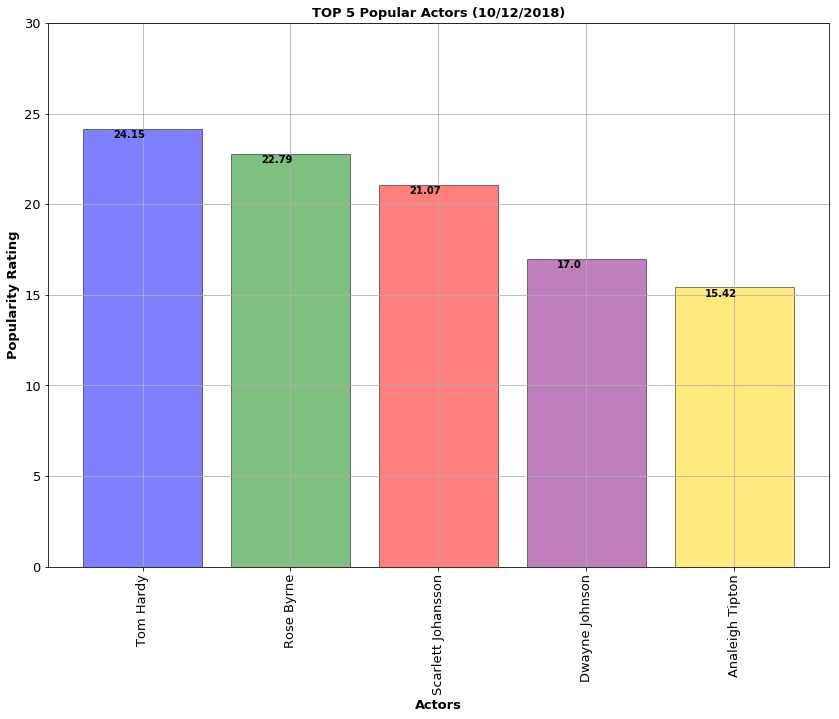

In [15]:
################ TMDB Combined Actor Data Graph 5.1 - TOP 5 Popular Actors Bar Graph ##################

# Set Date format for the title
Date = dt.now().strftime("(%m/%d/%Y)")

# Create Bar Graph
plt.figure(figsize = (14,10))
plt.ylim(0, 400)
x_axis = ag1["actor_name"]
y_axis= ag1["actor_popularity"]

plt.bar(x_axis,y_axis, color = ['b', 'green', 'red','purple', 'gold'],alpha=0.5, align="center", edgecolor = "black")


# Set Plot Properties
plt.title("TOP 5 Popular Actors " +  str(Date),fontweight='bold',fontsize=13)
plt.xticks(rotation=90,fontsize=13)
plt.yticks(rotation=360,fontsize=13)
plt.ylabel("Popularity Rating",fontweight='bold',fontsize=13)
plt.xlabel("Actors",fontweight='bold',fontsize=13)
plt.ylim(0,30)

plt.grid()

# Adds aggregate text on the bars
for a, k in enumerate(y_axis):    
   plt.text(a-0.2, k-0.5, str(round(k,2)), color='black',rotation='horizontal', fontweight='bold',fontsize=10)        


# Save the figure
plt.savefig("TMDB Combined Actor Data TOP 5 Popular Actors Bar Plot.png", bbox_inches='tight')

# Show the Plot
plt.show()

In [16]:
# TMDB Combined Actor Data Graph 5.2  Create x and y axis variables for Scatter Plot
tmdb_actors = tmdb_data_load_df[['title','actor_name', 'actor_popularity', 'actor_deathday']]
tmdb_actors_sort = tmdb_actors.sort_values('actor_popularity', ascending=False).nlargest(12, 'actor_popularity')
actor_groups =tmdb_actors_sort['actor_popularity'].groupby(tmdb_actors_sort['actor_name']).value_counts()
actor_grouped= (pd.DataFrame(actor_groups))
actor_grouped 
actor_popular = actor_grouped.rename(columns={'actor_name': 'actor_name', 'actor_popularity': 'actor_popularity','actor_popularity': 'Movie Count'})
ap =actor_popular.reset_index()
ap1 = ap.sort_values(["actor_popularity"], ascending=False)
ap1

actor_name  actor_popularity  Movie Count
4           Tom Hardy            24.151            1
2          Rose Byrne            22.788            2
3  Scarlett Johansson            21.067            2
1      Dwayne Johnson            17.001            6
0     Analeigh Tipton            15.417            1

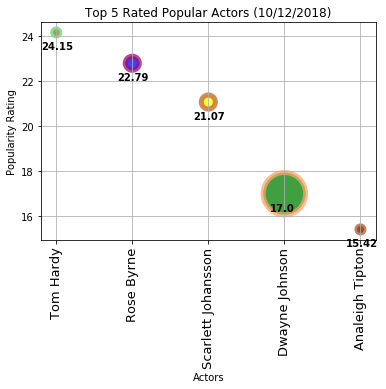

In [17]:
################# TMDB Combined Actor Data Graph 5.2 - TOP 5 Popular Actors Bubble plot ##################

# Set Date format for the title
Date = dt.now().strftime("(%m/%d/%Y)")

# Create Scatter Plot
n = 50
c, ec = np.random.rand(2, n, 4)
area_scale, width_scale = 50, 5
x = ap1["actor_name"]
y = ap1["actor_popularity"]
s = ap1["Movie Count"]
c = ["red","b", "yellow", "green","black"]

fig, ax = plt.subplots()
ax.scatter(x, y, s=np.square(s)*area_scale, c=c, alpha = 0.75,edgecolor=ec, linewidth=1*width_scale)

# Adds aggregate text on the bars
for a, k in enumerate(y):    
    plt.text(a-0.195, k-0.75, str(round(k,2)), color='black',rotation='horizontal', fontweight='bold')        

# Set Plot Properties
plt.title("Top 5 Rated Popular Actors "+  str(Date))
plt.xlabel("Actors")
plt.ylabel("Popularity Rating")
plt.xticks(rotation=90,fontsize=13)

ax.grid()

# Save the figure
plt.savefig("TMDB Combined Actor Data TOP 5 Popular Actors Bubble Plot.png", bbox_inches='tight')

# Show the Plot
plt.show()

In [18]:
# Create TMDB Combined Director data x & y variables for Bar Graph

tmdb_directors = tmdb_data_load_df[['title','director_name', 'director_popularity', 'director_deathday']]
tmdb_directors_sort = tmdb_directors.sort_values('director_popularity', ascending=False).nlargest(10, 'director_popularity')
director_groups =tmdb_directors_sort['director_popularity'].groupby(tmdb_directors_sort['director_name']).first()
director_grouped= (pd.DataFrame(director_groups))
dg =director_grouped.reset_index() 
dg1=dg.sort_values('director_popularity', ascending=False)
dg1

director_name  director_popularity
3      Karen Gillan                8.432
4  Steven Spielberg                7.714
0       Brie Larson                7.180
2      James Franco                7.040
1    Clint Eastwood                6.709

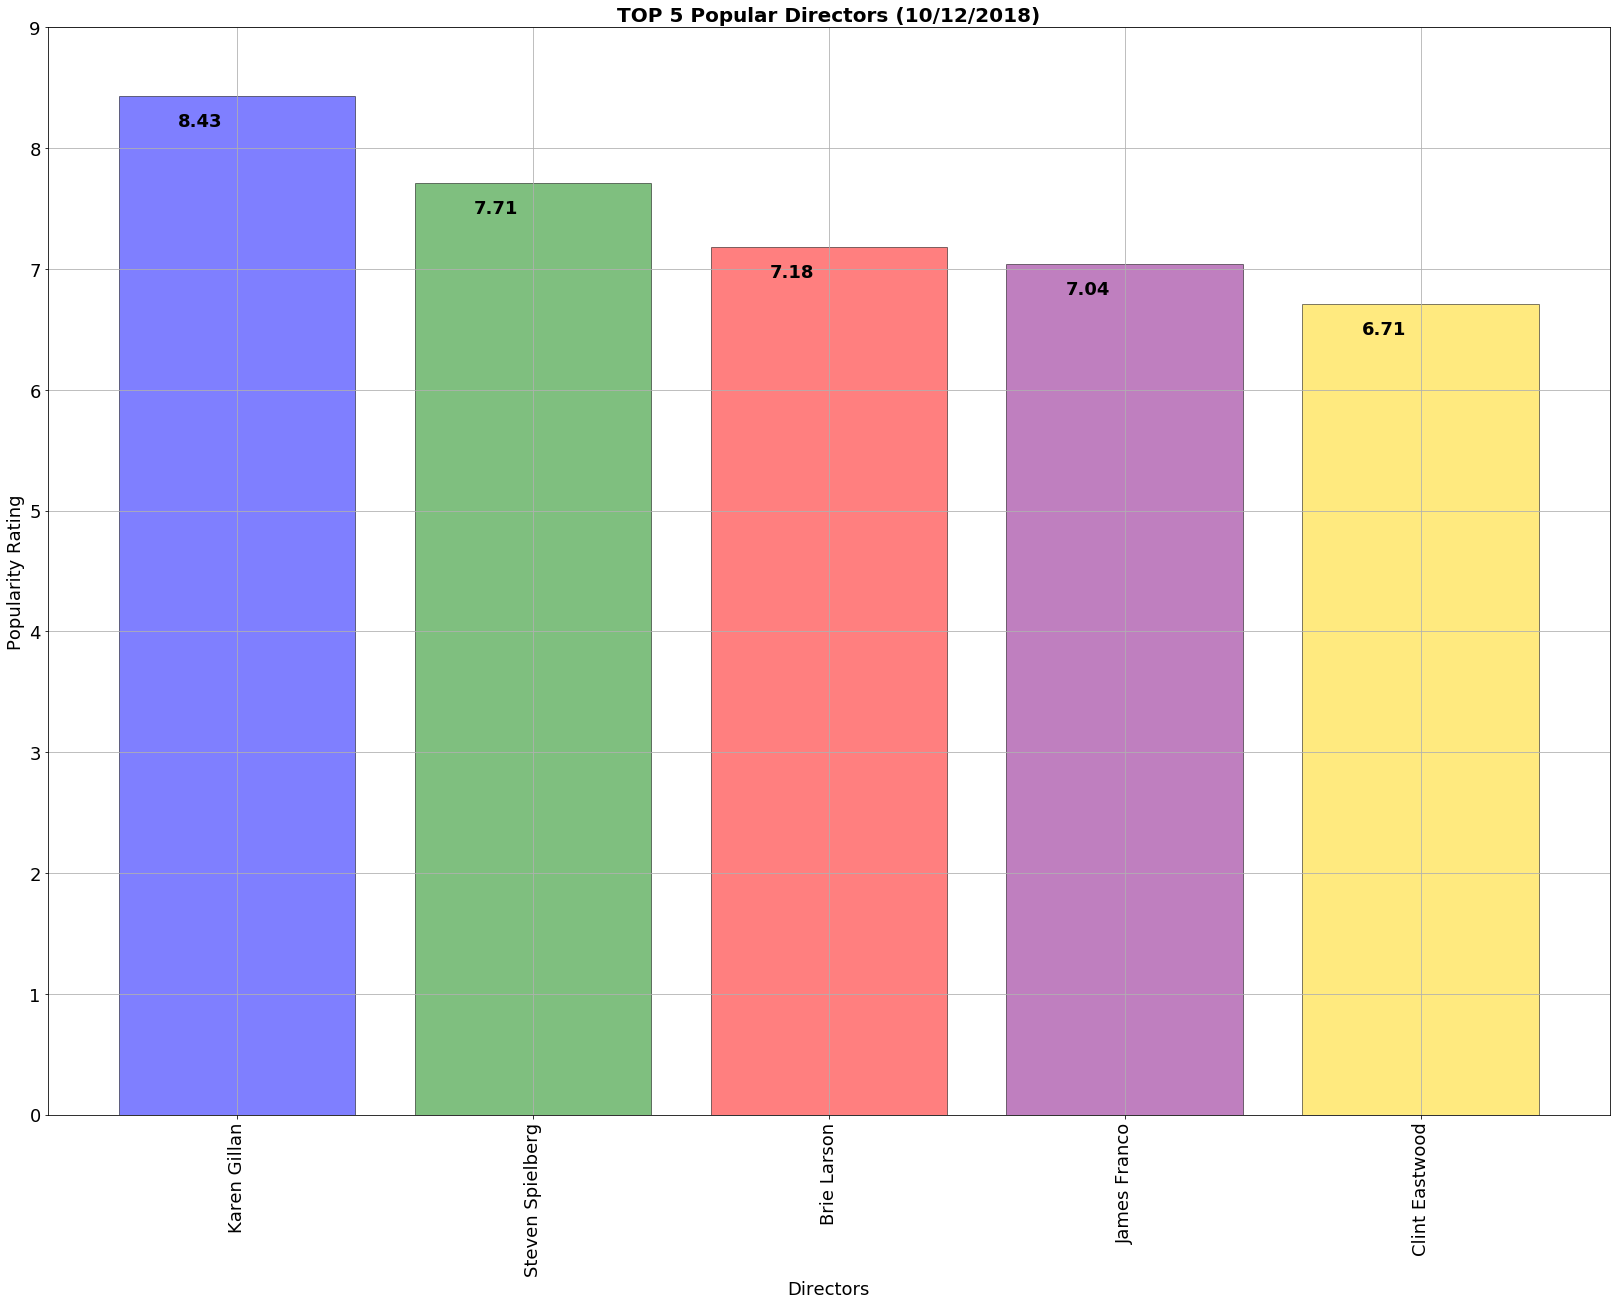

In [19]:
################# TMDB Combined Director Data Graph 6.1 - TOP 5 Popular Directors Bar plot ##################

# Set Date format for the title
Date = dt.now().strftime("(%m/%d/%Y)")

# Create Bar Graph
plt.figure(figsize = (28,20))
plt.ylim(0, 400)
x_axis = dg1["director_name"]
y_axis= dg1["director_popularity"]

plt.bar(x_axis,y_axis, color = ['b', 'green', 'red','purple', 'gold'],alpha=0.5, align="center", edgecolor = "black")


# Set Plot Properties
plt.title(("TOP 5 Popular Directors "+  str(Date)),fontweight='bold',fontsize=20)
plt.xticks(rotation=90,fontsize=18)
plt.yticks(rotation=360,fontsize=18)
plt.ylabel("Popularity Rating",fontsize=18)
plt.xlabel("Directors",fontsize=18)
plt.ylim(0,9.0)

plt.grid()

# Adds aggregate text on the bars
for a, k in enumerate(y_axis):    
    plt.text(a-0.2, k-0.25, str(round(k,2)), color='black',rotation='horizontal', fontweight='bold',fontsize=18)        
        
# Save the figure
plt.savefig("TMDB Combined Director Data TOP 5 Popular Directors Bar Plot.png", bbox_inches='tight')

# Show the Plot
plt.show()

In [20]:
# Create TMDB Combined Director x & y variables for Bubble plot
tmdb_directors = tmdb_data_load_df[['title','director_name', 'director_popularity', 'director_deathday']]
tmdb_directors_sort = tmdb_directors.sort_values('director_popularity', ascending=False).nlargest(10, 'director_popularity')
director_groups =tmdb_directors_sort['director_popularity'].groupby(tmdb_directors_sort['director_name']).value_counts()
director_grouped= (pd.DataFrame(director_groups))
director_grouped 
director_popular = director_grouped.rename(columns={'director_name': 'director_name', 'director_popularity': 'director_popularity','director_popularity': 'Movie Count'})
dp =director_popular.reset_index()
dp1 = dp.sort_values(["director_popularity"], ascending=False)
dp1

director_name  director_popularity  Movie Count
3      Karen Gillan                8.432            1
4  Steven Spielberg                7.714            2
0       Brie Larson                7.180            1
2      James Franco                7.040            5
1    Clint Eastwood                6.709            1

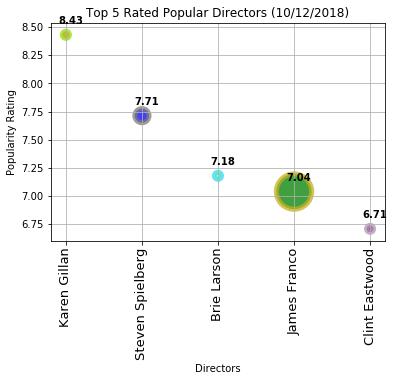

In [21]:
################# TMDB Combined Director Data Graph 6.2 - TOP 5 Popular Directors Bubble plot ##################

# Set Date format for the title
Date = dt.now().strftime("(%m/%d/%Y)")

# Create Scatter Plot
n = 50
c, ec = np.random.rand(2, n, 4)
area_scale, width_scale = 50, 5
x = dp1["director_name"]
y = dp1["director_popularity"]
s = dp1["Movie Count"]
c = ["tomato","b", "yellow", "green","purple"]

fig, ax = plt.subplots()
sc = ax.scatter(x, y, s=np.square(s)*area_scale, c=c, alpha = 0.75,edgecolor=ec, linewidth=1*width_scale)

# Adds aggregate text on the bars
for a, k in enumerate(y):    
    plt.text(a-0.095, k+0.095, str(round(k,2)), color='black',rotation='horizontal', fontweight='bold')        

# Set Plot Properties
plt.title("Top 5 Rated Popular Directors " +  str(Date))
plt.xlabel("Directors")
plt.ylabel("Popularity Rating")
plt.xticks(rotation=90,fontsize=13)
  
ax.grid()

# Save the figure
plt.savefig("TMDB Combined Director Data TOP 5 Popular Directors Bubble Plot.png", bbox_inches='tight')

# Show the Plot
plt.show()

In [22]:
## Create Movie(Mojo+TMDB) Complete Dataset Lead Actor Opening Total Comparison on Gender x & y variables for Bar plot 
movie_complete_load_df = pd.DataFrame(movie_complete_load_df)
movie_complete = movie_complete_load_df[['actor_name', 'actor_gender', 'opening_total']]
movie_complete_sort = movie_complete.sort_values('opening_total', ascending=False).nlargest(12, 'opening_total')
movie_complete_groups =movie_complete_sort.groupby(['actor_name','actor_gender'])["opening_total"].mean()
mc =movie_complete_groups.reset_index()
mc1= mc.sort_values(["opening_total"], ascending=False)
mc1['actor_gender'] = mc1['actor_gender'].replace({1: 'Female', 2: 'Male'})
#mc1["opening_total"]= mc1["opening_total"].map("${:,.0f}".format)
mc1

actor_name actor_gender  opening_total
7  Robert Downey Jr.         Male    257698183.0
6        Mark Hamill         Male    220009584.0
0   Chadwick Boseman         Male    202003951.0
3        Emma Watson       Female    174750616.0
2        Chris Pratt         Male    147267357.0
8      Ryan Reynolds         Male    125507153.0
5   Jaeden Lieberher         Male    123403419.0
1    Chris Hemsworth         Male    122744989.0
9        Tom Holland         Male    117027503.0
4          Gal Gadot       Female    103251471.0

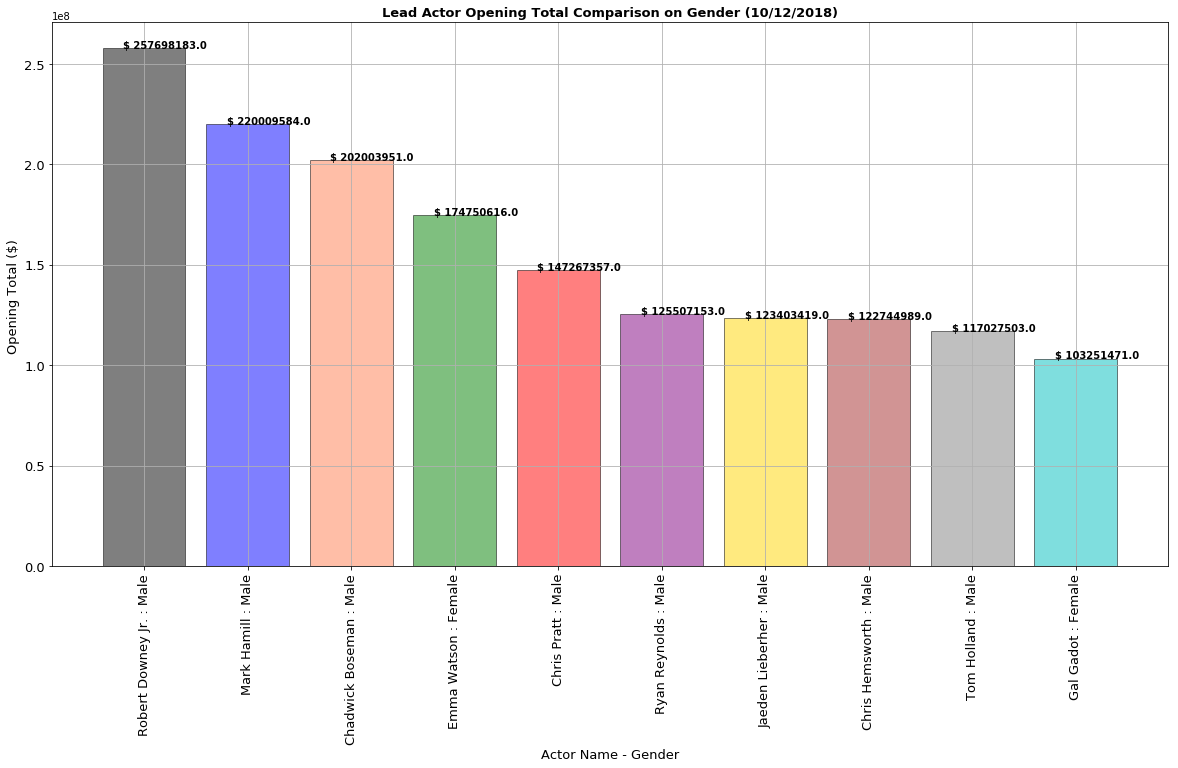

In [23]:
## Graph 7 Movie(Mojo+TMDB)Complete Dataset Lead Actor Opening Total Comparison on Gender Bar plot 

# Set Date format for the title
Date = dt.now().strftime("(%m/%d/%Y)")

# Create Bar Graph
plt.figure(figsize = (20,10))

y_axis = mc1[['actor_name', 'actor_gender']].apply(lambda x: ' : '.join(x), axis=1)
x_axis= mc1["opening_total"]

plt.bar(y_axis,x_axis, color = ['black','b', 'coral', 'green', 'red', 
                                'purple', 'gold','brown',
                                'grey', 'c'],alpha=0.5, align="center", edgecolor = "black")


# Set Plot Properties
plt.title(("Lead Actor Opening Total Comparison on Gender " +  str(Date)),fontweight='bold',fontsize=13)
plt.xticks(rotation=90,fontsize=13)
plt.yticks(rotation=360,fontsize=13)
plt.ylabel("Opening Total ($) ",fontsize=13)
plt.xlabel("Actor Name - Gender",fontsize=13)
plt.ylim(ymin=0)

plt.grid()

# Adds aggregate text on the bars
for a, k in enumerate(x_axis):    
    plt.text(a-0.2, k-0.25, "$ "+str(round(k,2)), color='black',rotation='horizontal', fontweight='bold',fontsize=10)        

# Save the figure
plt.savefig("Movie(Mojo+TMDB) Complete Dataset Lead Actor Opening Total Comparison on Gender Bar Plot.png", bbox_inches='tight')
    
    
# Show the Plot
plt.show()